# Project Financial Analysis

## Part 2: Exploratory Data Analysis

In this notebook, you will do the following:
1. Load the CSV that you obtained from Part I (go back there and do it first if you haven't)
2. Examine the quality and integrity of the data
3. Visualize prices over time
4. Engineer new features
5. Perform more visualization

In [1]:
# Step 1: Import your libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Read your CSV with pandas
df = pd.read_csv('finance_data.csv', index_col=0)
df

,1. open,2. high,3. low,4. close,5. volume
2021-06-24,0.53,0.53,0.53,0.53,0
2021-06-23,0.53,0.53,0.53,0.53,0
2021-06-22,0.53,0.53,0.53,0.53,0
2021-06-21,0.53,0.53,0.53,0.53,0
2021-06-18,0.53,0.53,0.53,0.53,0
...,...,...,...,...,...
2007-07-19,0.79,0.79,0.79,0.79,11000
2007-07-18,0.80,0.80,0.80,0.80,0
2007-07-17,0.80,0.80,0.80,0.80,0
2007-07-16,0.80,0.80,0.80,0.80,0


In [3]:
# Step 3: Check for missing data in columns in DataFrame
df.isnull().sum()

1. open      0
2. high      0
3. low       0
4. close     0
5. volume    0
dtype: int64

In [4]:
# Step 4: Check your DataFrame type
df.index.dtype

dtype('O')

In [5]:
# Step 5a: Convert your index into a DateTime
df.index = pd.to_datetime(df.index)

In [6]:
# Step 5b: Check your index's type again
df.index.dtype

dtype('<M8[ns]')

<AxesSubplot:>

<Figure size 1152x576 with 0 Axes>

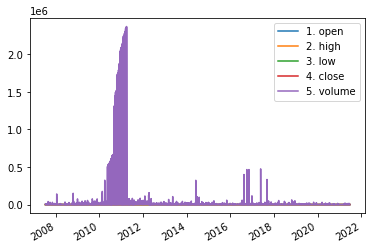

In [8]:
# Step 6: Plot your data in your DataFrame
plt.figure(figsize = (16,8))
df.plot()

### Step 7: Remove "Volume"
Looks like we can't see much, because we accidentally plotted "5. volume" which is many orders higher than the other four columns.

1. <strong>Drop</strong> the "5. volume" column
2. Assign the changed DataFrame to a new variable
3. Replot the new DataFrame

Make sure you don't override your original DataFrame! 

<AxesSubplot:>

<Figure size 1152x576 with 0 Axes>

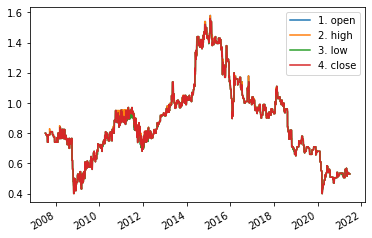

In [9]:
# Step 7: Drop "5. volume" and store the new DataFrame in a new variable, then plot the rest of the columns
df2 = df.drop('5. volume', axis = 1)
plt.figure(figsize=(16,8))
df2.plot()

# Engineer new features
Now that you've visualized the prices...what's next? It's good to also see if there are any direct seasonal variations in the price.

To do so, we will need to separate the dates into things like the month, the day, and the day of the week. Can we extract more information out of what we currently have? The answer is yes!

Remember our DataFrame index that is now a DateTime object? We can actually use some nifty methods to get those information! We will be extracting:
1. Day of the week (0-6, 0 = Monday, 6 = Sunday)
2. Month (1-12, 1 = January, 12 = December)
3. Day of the month (1-31)

In [10]:
# Step 8a: get the day of week and store it in a new column
df['day'] = df.index.dayofweek
df

,1. open,2. high,3. low,4. close,5. volume,day
2021-06-24,0.53,0.53,0.53,0.53,0,3
2021-06-23,0.53,0.53,0.53,0.53,0,2
2021-06-22,0.53,0.53,0.53,0.53,0,1
2021-06-21,0.53,0.53,0.53,0.53,0,0
2021-06-18,0.53,0.53,0.53,0.53,0,4
...,...,...,...,...,...,...
2007-07-19,0.79,0.79,0.79,0.79,11000,3
2007-07-18,0.80,0.80,0.80,0.80,0,2
2007-07-17,0.80,0.80,0.80,0.80,0,1
2007-07-16,0.80,0.80,0.80,0.80,0,0


In [11]:
# Step 8b: get day of the month and store it in a new column
df['day_of_month'] = df.index.day
df

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month
2021-06-24,0.53,0.53,0.53,0.53,0,3,24
2021-06-23,0.53,0.53,0.53,0.53,0,2,23
2021-06-22,0.53,0.53,0.53,0.53,0,1,22
2021-06-21,0.53,0.53,0.53,0.53,0,0,21
2021-06-18,0.53,0.53,0.53,0.53,0,4,18
...,...,...,...,...,...,...,...
2007-07-19,0.79,0.79,0.79,0.79,11000,3,19
2007-07-18,0.80,0.80,0.80,0.80,0,2,18
2007-07-17,0.80,0.80,0.80,0.80,0,1,17
2007-07-16,0.80,0.80,0.80,0.80,0,0,16


In [12]:
# Step 8c: get the month and store it in a new column
df['month'] = df.index.month
df

,1. open,2. high,3. low,4. close,5. volume,day,day_of_month,month
2021-06-24,0.53,0.53,0.53,0.53,0,3,24,6
2021-06-23,0.53,0.53,0.53,0.53,0,2,23,6
2021-06-22,0.53,0.53,0.53,0.53,0,1,22,6
2021-06-21,0.53,0.53,0.53,0.53,0,0,21,6
2021-06-18,0.53,0.53,0.53,0.53,0,4,18,6
...,...,...,...,...,...,...,...,...
2007-07-19,0.79,0.79,0.79,0.79,11000,3,19,7
2007-07-18,0.80,0.80,0.80,0.80,0,2,18,7
2007-07-17,0.80,0.80,0.80,0.80,0,1,17,7
2007-07-16,0.80,0.80,0.80,0.80,0,0,16,7


### Step 9: Visualize the closing price by day, day of week, and month
Now that we have the new features extracted from the date, we can perform more visualization to identify additional patterns, if any.

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='4. close'>

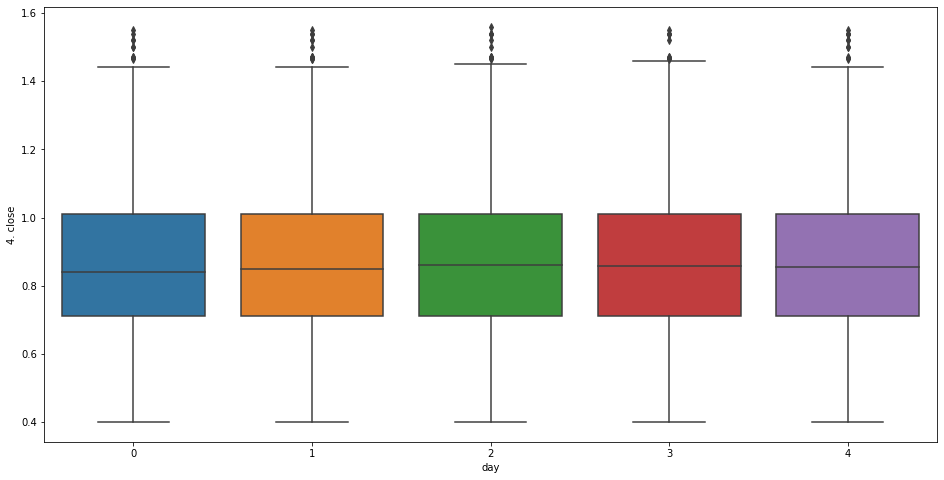

In [13]:
# Step 9a: Plot boxplots of close prices, separated by day of week
plt.figure(figsize = (16,8))
sns.boxplot(df['day'], df['4. close'])

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day_of_month', ylabel='4. close'>

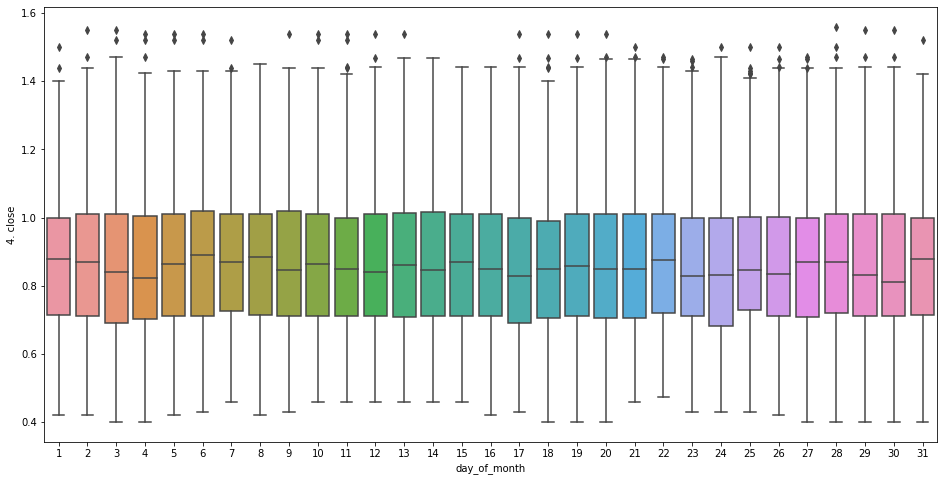

In [14]:
# Step 9b: Plot boxplots of close prices, separated by day of month
plt.figure(figsize = (16,8))
sns.boxplot(df['day_of_month'], df['4. close'])

c:\users\hslim\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='4. close'>

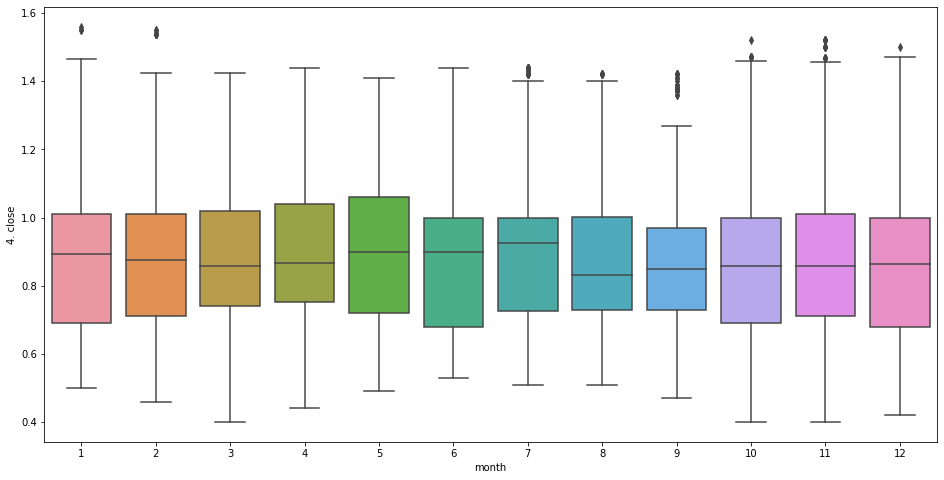

In [15]:
# Step 9c: Plot boxplots of close prices, separated by month
plt.figure(figsize = (16,8))
sns.boxplot(df['month'], df['4. close'])

Looks like there doesn't seem to be any wild seasonal variation in the dataset, i.e., the boxplots don't differ too much in height.

In [16]:
# Step 10: Export your CSV (use a different filename as the one you exported from Part I)
df.to_csv('finance_data_extended.csv')